# Instructions
1. Run the cell below
2. pick the number of days you want to generate data from: num_days
3. call make_training_data(days=num_days)
Note: the only year available right now is 1979


In [11]:
import netCDF4 as nc
from os import listdir, system
from os.path import isfile, join, isdir
import re
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

def make_time_slice(dataset, time, variables, x=768, y=1152):
    variables_at_time_slice = [dataset[k][time] for k in variables]
    tensor = np.vstack(variables_at_time_slice).reshape(len(variables), x,y)
    return tensor

def make_spatiotemporal_tensor(dataset,num_time_slices, variables, x=768, y=1152):
    time_slices = [ make_time_slice(dataset, time, variables) for time in range(num_time_slices) ]
    tensor = np.vstack(time_slices).reshape(num_time_slices, len(variables), x, y)
    return tensor

def make_training_data(year=1979, days=5):
    # this directory can be accessed from cori
    maindir="/project/projectdirs/dasrepo/gordon_bell/climate/data/big_images/" + \
    str(year) 
    
    lsdir=listdir(maindir)

    rpfile = re.compile(r"^cam5_.*\.nc$")
    camfiles = [f for f in lsdir if rpfile.match(f)]
    
    datasets = [ nc.Dataset(maindir+'/'+camfile, "r", format="NETCDF4") \
                for camfile in camfiles[:days] ]
    
    variables = [u'PRECT',
                 u'PS',
                 u'PSL',
                 u'QREFHT',
                 u'T200',
                 u'T500',
                 u'TMQ',
                 u'TREFHT',
                 u'TS',
                 u'U850',
                 u'UBOT',
                 u'V850',
                 u'VBOT',
                 u'Z1000',
                 u'Z200',
                 u'ZBOT']
    time_steps=8
    x=768
    y=1152
    day_slices = [make_spatiotemporal_tensor(dataset,time_steps,variables) for dataset in datasets]
    tr_data = np.vstack(day_slices).reshape(len(datasets), time_steps,len(variables), x, y)
    
    return tr_data

In [118]:
def make_patches(year=1979, days=1, time_chunk_size=8, space_chunk_size=128):
    ''' a little messy, but returns an array of 
    n_ex, time_chunk_size, variables, by num_chunks in x dir, 
    by space_chunk_size x by num chunks in y dir by space chunk size y'''
    
    x = make_training_data(days=days)
    variables = x.shape[2]
    h,w = x.shape[3:]
    x_cont= x.reshape(x.shape[0] * x.shape[1], x.shape[2], x.shape[3], x.shape[4])
    n_time_steps = x_cont.shape[0] / time_chunk_size
    n_space_chunks = (w / space_chunk_size) * (h / space_chunk_size)
    x_cont = x_cont.reshape(n_time_steps, time_chunk_size, x.shape[2],h / space_chunk_size, space_chunk_size, w/ space_chunk_size, space_chunk_size )
    return x_cont


In [115]:
x= make_patches()

In [108]:
def plot_spatio_temporal_patches(patch):
    time_steps = patch.shape[0]
    x_dim = patch.shape[1]
    y_dim = patch.shape[3]
    print x_dim, y_dim
    count=0
    plt.figure(figsize=(80,80))
    for t in range(time_steps):
        fig = plt.figure(t)
        count=0
        for x in range(x_dim):
            for y in range(y_dim):
                count+=1
                sp = fig.add_subplot(x_dim, y_dim, count)
                sp.imshow(patch[t,x,:,y])
                sp.axis('off')
    plt.axis('off')
    plt.show()

In [119]:
def plot_spatio_temporal_patch(patch):
    time_steps = patch.shape[0]
    print patch.shape
    count=0
    plt.figure(figsize=(30,30))
    for t in range(time_steps):
                count+=1
                sp = plt.subplot(time_steps, 1, count)
                sp.imshow(patch[t])
                sp.axis('off')
    plt.axis('off')
    plt.show()

(8, 128, 128)


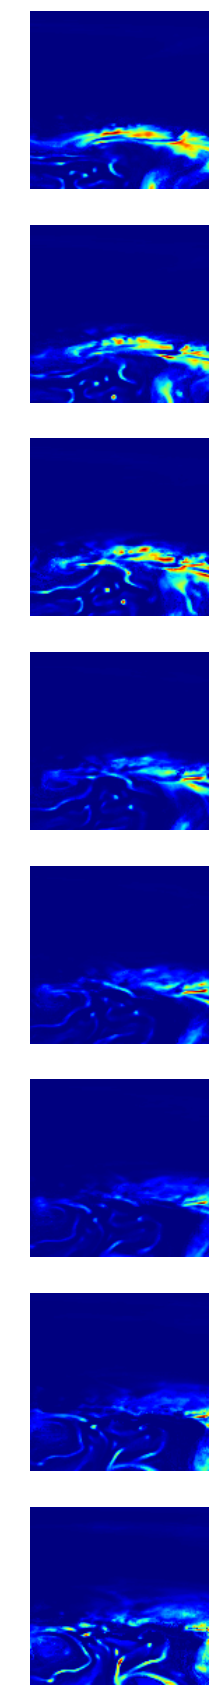

In [120]:
plot_spatio_temporal_patch(x[0,:,0,0,:,0,:])

In [61]:
x_tr=make_training_data(days=2)

6